## IMPORTING LIBRARIES & Loading the Kaggle dataset

In [1]:
import nltk
import re
import pandas as pd 
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.collocations import *
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer 


pattern = re.compile('^[^a-z]+$')

#Loading the Kaggle 
df = pd.read_csv('resume_dataset.csv', encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Loading all the resumes stored in the "Resumes" Directory

In [3]:
from pyresparser import ResumeParser
from resume_parser import resumeparse
import os
import docx2txt
import requests
import pandas as pd
from pdfminer.high_level import extract_text
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

directory = r'Resumes/'
pdf = []
docs = []
pyresparser = []
resumeparser = []
for filename in os.listdir(directory):
    print(filename)
    data = {}
    if filename.endswith(".docx"):
        path = os.path.join(directory, filename)
        
        data = resumeparse.read_file(path)
        data['text'] = extract_text_from_docx(path)
        
              
        resumeparser.append(data)
        
        data = ResumeParser(path).get_extracted_data()
        data['text'] = extract_text_from_docx(path)
        
        pyresparser.append(data)
        
        
        
    elif filename.endswith(".pdf"):

               
        path = os.path.join(directory, filename)
        
        data = resumeparse.read_file(path)
        data['text'] = extract_text_from_pdf(path)
        
              
        resumeparser.append(data)
        
        data = ResumeParser(path).get_extracted_data()
        data['text'] = extract_text_from_pdf(path)
        
        pyresparser.append(data)

    else:
        continue
    

pyres_df = pd.DataFrame(pyresparser)


AbhiramResume.docx
NikResume.pdf
Shiwen.pdf
SnehalGhatpande.pdf


In [4]:

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("months")
monthstopwords = ["january", "february", "march", "april", "may", "june", "july", 
"august", "september", "octorber", "november", "december"]
stopwords.extend(monthstopwords)
def alpha_filter(w):
  # pattern to match a word of non-alphabetical characters
    if (pattern.match(w)):
        return True
    else:
        return False


## Creating a function for Preprocessing

In [5]:
from nltk.stem import WordNetLemmatizer 
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

def steps123(text):


    tokens = nltk.word_tokenize(text)
    # #Removing stopwords
    stopwords = nltk.corpus.stopwords.words('english') 
    stopwords.append("months")
    monthstopwords = ["january", "february", "march", "april", "may", "june", "july","august", "september", "octorber", "november", "december"]
    stopwords.extend(monthstopwords)
    lemmatizer = WordNetLemmatizer()

    totalResumeWords = set()
    for w in tokens:
        w = lemmatizer.lemmatize(w)
        tagged = nltk.pos_tag([w])

        if w.lower() not in stopwords and not alpha_filter(w):
             if tagged[0][1] in ["NN", "NNS", "NNP","NNPS","JJ"]:
                 totalResumeWords.add(w.lower())
    return list(totalResumeWords)

df["Processed"] = df['Resume'].apply(lambda x: steps123(x))

df.head()

,Category,Resume,Processed
0,Data Science,Skills * Programming Languages: Python (pandas...,"[year, effective, research, language, month, y..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[treatment, github.com/rathorology, year, beng..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[activities, year, school, engineering-, month..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[year, insight, capture, algorithm, complex, m..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[year, education, database, monthscompany, mon..."


#### Replacing the categorical labels into 3 major types -> Software ; Non Technical ; Data Science

In [6]:
df.replace({'Category':{"Java Developer":"Software",
"HR":"Non Technical",
"Database":"Data Science",
"Advocate":"Non Technical",
"Testing":"Software",
"Hadoop":"Data Science",
"DevOps Engineer":"Software",
"DotNet Developer":"Software",
"Automation Testing":"Software",
"Arts":"Non Technical",
"SAP Developer":"Software",
"Python Developer":"Software",
"Health and fitness":"Non Technical",
"Business Analyst":"Data Science",
"Civil Engineer":"Non Technical",
"Blockchain":"Software",
"Sales":"Non Technical",
"Mechanical Engineer":"Non Technical",
"Network Security Engineer":"Software",
"ETL Developer":"Software",
"Web Designing":"Software",
"Electrical Engineering":"Non Technical",
"Operations Manager":"Non Technical",
"PMO":"Non Technical"
}},inplace =  True)

In [7]:
df["Category"].value_counts()

Software         74
Non Technical    61
Data Science     34
Name: Category, dtype: int64

In [8]:
df["Processed1"] = df["Processed"].apply(lambda x:' '.join(x))
df.head()

,Category,Resume,Processed,Processed1
0,Data Science,Skills * Programming Languages: Python (pandas...,"[year, effective, research, language, month, y...",year effective research language month young h...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[treatment, github.com/rathorology, year, beng...",treatment github.com/rathorology year bengalur...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[activities, year, school, engineering-, month...",activities year school engineering- month guid...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[year, insight, capture, algorithm, complex, m...",year insight capture algorithm complex month v...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[year, education, database, monthscompany, mon...",year education database monthscompany month da...


Training a Random Forest Classifier Model

In [36]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
# Create a series to store the labels: y
X, y = df.Processed1, df.Category

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords)
X = vectorizer.fit_transform(X).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 2 0]
 [0 6 0]
 [0 1 7]]
               precision    recall  f1-score   support

 Data Science       1.00      0.33      0.50         3
Non Technical       0.67      1.00      0.80         6
     Software       1.00      0.88      0.93         8

     accuracy                           0.82        17
    macro avg       0.89      0.74      0.74        17
 weighted avg       0.88      0.82      0.81        17

0.8235294117647058


Using the Model to predict the resumes

In [12]:
pyres_df["processed"] = pyres_df["text"].apply(lambda x:' '.join(steps123(x)))
pyres_df.head()

,name,email,mobile_number,skills,college_name,degree,designation,experience,company_names,no_of_pages,total_experience,text,processed
0,ABHIRAM GOPAL,agopal@syr.edu,315-991-0963,"[Operations, Excel, Database, Cloud, Research,...",None,None,"[Solutions Architect Associate, Project Lead]",None,None,NaN,0.00,ABHIRAM GOPAL \n315-991-0963 ● agopal@syr.ed...,mechanical operations excel sept sigma concern...
1,Nikhil Bharadwaj,official.nikhil3639@gmail.com,450-3272,"[System, Tablets, Servers, Cloud, Android, Web...",None,None,None,"[Software Engineer Intern, • Optimized core n...",None,1.0,2.17,Nikhil Bharadwaj \nofficial.nikhil3639@gmail.c...,resource concern logn logic flexibility algori...
2,Wang Aug.,swang134@syr.edu,372-0106,"[Excel, Sales, Database, Website, Research, R,...",None,None,[Graduate Teaching Assistant],None,[Amazon],1.0,0.00,Shiwen (Valerie) Wang ...,resource mechanical e-board excel activities s...
3,Snehal Ghatpande,sghatpan@syr.edu,315 278 5618,"[System, Excel, Sales, Database, Cloud, Resear...",None,"[M.S. in Information Management, B.E. in Infor...",[Data Analyst],"[Data Analyst, iConsult Collaborative, Syracus...","[Oracle, Microsoft]",1.0,3.50,Snehal Ghatpande \n\nwww.linkedin.com/in/ghatp...,excel effective sept naïve insight driven biva...


In [34]:
to_predict = pyres_df["processed"]
testdocuments = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(to_predict)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    testdocuments.append(document)

X = vectorizer.transform(testdocuments).toarray()
X = tfidfconverter.transform(X).toarray()



Doing PC decomposition & visualizin the data

<Figure size 288x216 with 0 Axes>

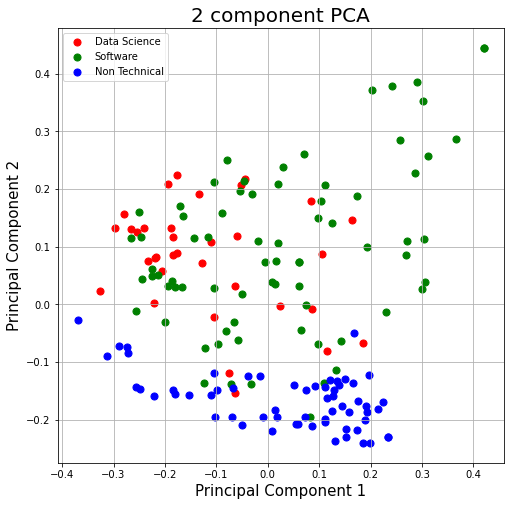

In [17]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

X, y = df.Processed1, df.Category
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords)
X = vectorizer.fit_transform(X).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()


pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca.fit(X)
X = pca.transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Data Science', 'Software', 'Non Technical']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Category'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import numpy as np
# Create the list of alphaas: alphas
alphas = np.arange(0,1,.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(X_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(X_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8823529411764706

Alpha:  0.1
Score:  0.9117647058823529

Alpha:  0.2
Score:  0.8823529411764706

Alpha:  0.30000000000000004
Score:  0.8823529411764706

Alpha:  0.4
Score:  0.8823529411764706

Alpha:  0.5
Score:  0.8529411764705882

Alpha:  0.6000000000000001
Score:  0.8235294117647058

Alpha:  0.7000000000000001
Score:  0.8235294117647058

Alpha:  0.8
Score:  0.8235294117647058

Alpha:  0.9
Score:  0.7941176470588235



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Going with 0.1 Alpha

In [31]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha = 0.1)
# Fit to the training data
nb_classifier.fit(X_train,y_train)
# Predict the labels: pred
pred = nb_classifier.predict(X_test)
# Compute accuracy: score
score = metrics.accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))



[[ 5  0  1]
 [ 0 10  1]
 [ 1  0 16]]
               precision    recall  f1-score   support

 Data Science       0.83      0.83      0.83         6
Non Technical       1.00      0.91      0.95        11
     Software       0.89      0.94      0.91        17

     accuracy                           0.91        34
    macro avg       0.91      0.89      0.90        34
 weighted avg       0.92      0.91      0.91        34

0.9117647058823529


In [ ]:
test_df['major'] = ['MS in Business Analytics','']

In [40]:
X = vectorizer.transform(testdocuments).toarray()
X = tfidfconverter.transform(X).toarray()

test_df = pyres_df[['name','major','text']]
#Naive Bayes CLassifier
test_df["NB_Classifier"] = nb_classifier.predict(X)

#Random Forest Classifier
test_df["RF_Classifier"] = classifier.predict(X)
test_df.head()

,name,text,NB_Classifier,RF_Classifier
0,ABHIRAM GOPAL,ABHIRAM GOPAL \n315-991-0963 ● agopal@syr.ed...,Data Science,Data Science
1,Nikhil Bharadwaj,Nikhil Bharadwaj \nofficial.nikhil3639@gmail.c...,Software,Software
2,Wang Aug.,Shiwen (Valerie) Wang ...,Data Science,Non Technical
3,Snehal Ghatpande,Snehal Ghatpande \n\nwww.linkedin.com/in/ghatp...,Software,Non Technical


## Importing a pretrained Gensim model ( trained on the Kaggle dataset )

In [88]:
import gensim.downloader as api
import json
from gensim.models.word2vec import Word2Vec
import pyemd

#Wikipedia 2014 + Gigaword 5 (6B tokens, uncased) ;Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased
model = Word2Vec.load("final.modelall")

wordlistA = ['data','science']
wordlistB = ['python']
model.wv.wmdistance(wordlistA, wordlistB)




0.5389326098236442

### To rate the resume, we shall be finding the word2vec distance score between the processed tokens of the resume & the model's tokens


In [101]:
def rating_resume(processed_text):
    requirement = ["data","science"]
    processed_list = processed_text.split()
    score = model.wv.wmdistance(requirement, processed_list)
    return score
    
pyres_df['rating'] = pyres_df['text'].apply(rating_resume)
pyres_df.head()

,name,email,mobile_number,skills,college_name,degree,designation,experience,company_names,no_of_pages,total_experience,text,processed,rating
0,ABHIRAM GOPAL,agopal@syr.edu,315-991-0963,"[Operations, Excel, Database, Cloud, Research,...",None,None,"[Solutions Architect Associate, Project Lead]",None,None,NaN,0.00,ABHIRAM GOPAL \n315-991-0963 ● agopal@syr.ed...,mechanical operations excel sept sigma concern...,0.468287
1,Nikhil Bharadwaj,official.nikhil3639@gmail.com,450-3272,"[System, Tablets, Servers, Cloud, Android, Web...",None,None,None,"[Software Engineer Intern, • Optimized core n...",None,1.0,2.17,Nikhil Bharadwaj \nofficial.nikhil3639@gmail.c...,resource concern logn logic flexibility algori...,0.485308
2,Wang Aug.,swang134@syr.edu,372-0106,"[Excel, Sales, Database, Website, Research, R,...",None,None,[Graduate Teaching Assistant],None,[Amazon],1.0,0.00,Shiwen (Valerie) Wang ...,resource mechanical e-board excel activities s...,0.461190
3,Snehal Ghatpande,sghatpan@syr.edu,315 278 5618,"[System, Excel, Sales, Database, Cloud, Resear...",None,None,[Data Analyst],"[Data Analyst, iConsult Collaborative, Syracus...","[Oracle, Microsoft]",1.0,3.50,Snehal Ghatpande \n\nwww.linkedin.com/in/ghatp...,excel effective sept naïve insight driven biva...,0.454821


In [102]:
## Appending to our Test_df
test_df['rating'] = pyres_df['rating']
test_df

<ipython-input-102-433027ef3396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rating'] = pyres_df['rating']


,name,text,NB_Classifier,RF_Classifier,rating
0,ABHIRAM GOPAL,ABHIRAM GOPAL \n315-991-0963 ● agopal@syr.ed...,Data Science,Data Science,0.468287
1,Nikhil Bharadwaj,Nikhil Bharadwaj \nofficial.nikhil3639@gmail.c...,Software,Software,0.485308
2,Wang Aug.,Shiwen (Valerie) Wang ...,Data Science,Non Technical,0.461190
3,Snehal Ghatpande,Snehal Ghatpande \n\nwww.linkedin.com/in/ghatp...,Software,Non Technical,0.454821
